This follows the work in 04-MulitpleRegressionModels_AutomobileMpg.ipynb

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings("ignore") # warning are turned off, just to do tutorial

In [3]:
automobile_df = pd.read_csv('datasets/auto-mpg-processed.csv')

automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,15.0,8,304.0,150,3892,12.5,48
1,19.2,6,231.0,105,3535,19.2,42
2,26.0,4,96.0,69,2189,18.0,48
3,26.0,4,79.0,67,1963,15.5,46
4,29.0,4,97.0,75,2171,16.0,45


In [4]:
result_dict = {}

In [6]:
def build_model(regression_fn,          # takes in training data and corresponding target values      
                name_of_y_col,          # for the target values
                names_of_x_cols,        # for the features
                dataset, 
                test_frac=0.2,          # the fraction of our dataset which is used for test data
                preprocess_fn=None,
                show_plot_Y=False,
                show_plot_scatter=False):
    
    X = dataset[names_of_x_cols]
    Y = dataset[name_of_y_col]

    if preprocess_fn is not None:
        X = preprocess_fn(X)

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_frac)
    
    model = regression_fn(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    print("Training_score : " , model.score(x_train, y_train))
    print("Test_score : ", r2_score(y_test, y_pred))

    if show_plot_Y == True:
        fig, ax = plt.subplots(figsize=(12, 8))
        
        plt.plot(y_pred, label='Predicted')
        plt.plot(y_test.values, label='Actual')
        
        plt.ylabel(name_of_y_col)

        plt.legend()
        plt.show()

    if show_plot_scatter == True:
        fig, ax = plt.subplots(figsize=(12, 8))
        
        plt.scatter(x_test, y_test)
        plt.plot(x_test, y_pred, 'r')
        
        plt.legend(['Predicted line','Observed data'])
        plt.show()
    
    return {
            'training_score': model.score(x_train, y_train),
            'test_score': r2_score(y_test, y_pred)
           }     

In [7]:
def compare_results():
    for key in result_dict:
        print('Regression: ', key)
        print('Training score', result_dict[key]['training_score'])
        print('Test score', result_dict[key]['test_score'])
        print()

In [8]:
def linear_reg(x_train, y_train):
    model = LinearRegression(normalize=True)
    model.fit(x_train, y_train)
    
    return model

Training_score :  0.7105014370591779
Test_score :  0.6087580468377431


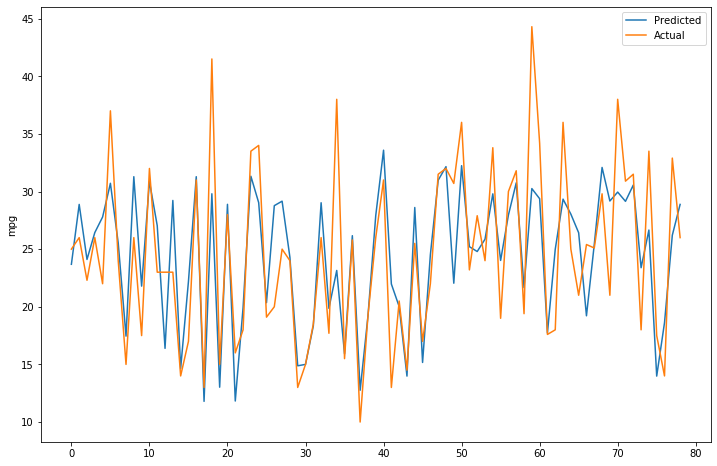

In [9]:
result_dict['mpg ~ single_linear'] = build_model(linear_reg,
                                                 'mpg',
                                                ['weight'],
                                                  automobile_df,
                                                  show_plot_Y=True)

Training_score :  0.701131072298487
Test_score :  0.729229225132911


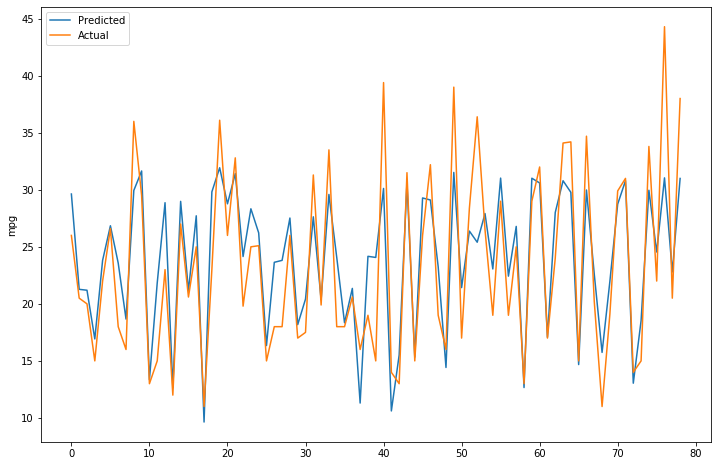

In [10]:
result_dict['mpg ~ kitchen_sink_linear'] = build_model(linear_reg,
                                                      'mpg',
                                                     ['cylinders',
                                                      'displacement',
                                                      'horsepower',
                                                      'weight',
                                                      'acceleration'],
                                                      automobile_df,
                                                      show_plot_Y=True)

Training_score :  0.7091659495458191
Test_score :  0.6882830579160173


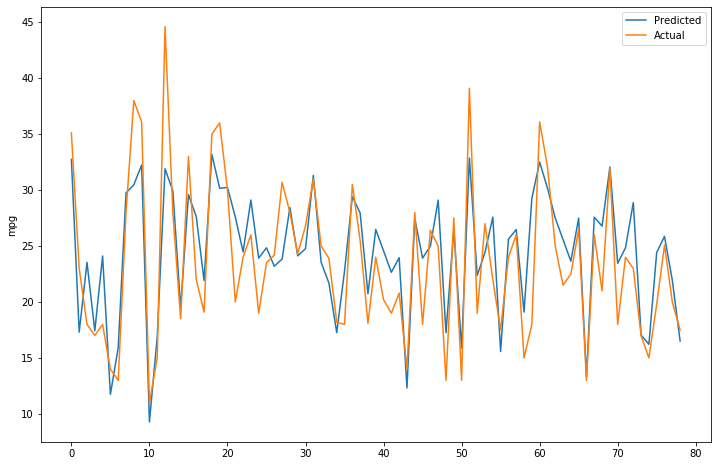

In [11]:
result_dict['mpg ~ parsimonius_linear'] = build_model(linear_reg,
                                                      'mpg',
                                                    ['horsepower',
                                                     'weight'],
                                                      automobile_df,
                                                      show_plot_Y=True)

In [12]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.7105014370591779
Test score 0.6087580468377431

Regression:  mpg ~ kitchen_sink_linear
Training score 0.701131072298487
Test score 0.729229225132911

Regression:  mpg ~ parsimonius_linear
Training score 0.7091659495458191
Test score 0.6882830579160173



In [13]:
def lasso_reg(x_train, y_train, alpha=0.5):
    model = Lasso(alpha=alpha)
    model.fit(x_train, y_train)
    
    return model

Training_score :  0.7143193030284241
Test_score :  0.6770385844474878


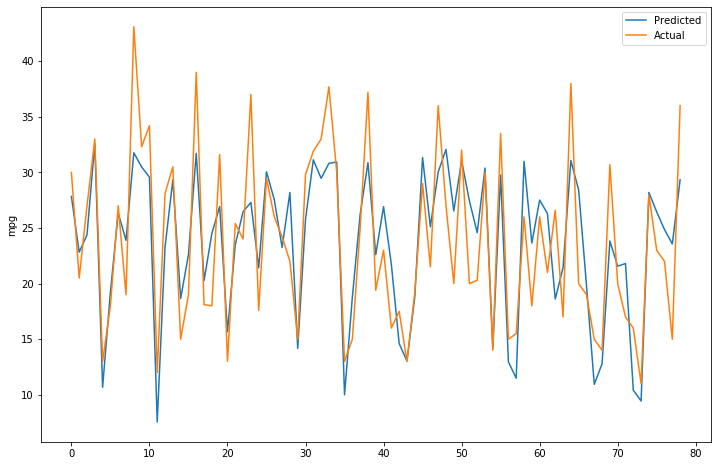

In [14]:
result_dict['mpg ~ kitchen_sink_lasso'] = build_model(lasso_reg,
                                                     'mpg',
                                                    ['cylinders',
                                                     'displacement',
                                                     'horsepower',
                                                     'weight',
                                                     'acceleration'],
                                                      automobile_df,
                                                      show_plot_Y=True)

In [15]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.7105014370591779
Test score 0.6087580468377431

Regression:  mpg ~ kitchen_sink_linear
Training score 0.701131072298487
Test score 0.729229225132911

Regression:  mpg ~ parsimonius_linear
Training score 0.7091659495458191
Test score 0.6882830579160173

Regression:  mpg ~ kitchen_sink_lasso
Training score 0.7143193030284241
Test score 0.6770385844474878



In [16]:
def ridge_reg(x_train, y_train, alpha=0.5, normalize=True):
    model = Ridge(alpha=alpha, normalize=normalize)
    model.fit(x_train, y_train)
    
    return model

Training_score :  0.6837654102537569
Test_score :  0.6693492082224509


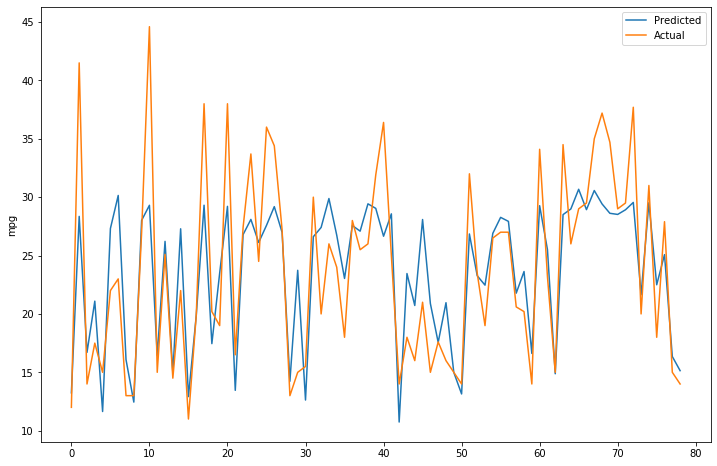

In [17]:
result_dict['mpg ~ kitchen_sink_ridge'] = build_model(ridge_reg,
                                                      'mpg',
                                                     ['cylinders',
                                                      'displacement',
                                                      'horsepower',
                                                      'weight',
                                                      'acceleration'],
                                                       automobile_df,
                                                       show_plot_Y=True)

In [18]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.7105014370591779
Test score 0.6087580468377431

Regression:  mpg ~ kitchen_sink_linear
Training score 0.701131072298487
Test score 0.729229225132911

Regression:  mpg ~ parsimonius_linear
Training score 0.7091659495458191
Test score 0.6882830579160173

Regression:  mpg ~ kitchen_sink_lasso
Training score 0.7143193030284241
Test score 0.6770385844474878

Regression:  mpg ~ kitchen_sink_ridge
Training score 0.6837654102537569
Test score 0.6693492082224509



In [19]:
def elastic_net_reg(x_train, y_train, alpha=1, l1_ratio=0.5, 
                    normalize=False, max_iter=100000, warm_start=True, equivalent_to="Elastic Net"):

    print("Equivalent to:", equivalent_to)
    
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, 
                       normalize=normalize, max_iter=max_iter, warm_start=warm_start)
    model.fit(x_train, y_train)

    return model

Equivalent to: OLS
Training_score :  0.71236570843431
Test_score :  0.6706834343569404


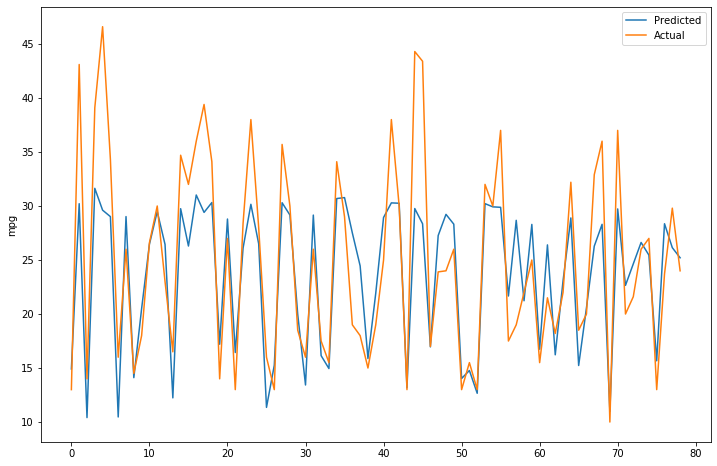

In [20]:
from functools import partial

## This generates a warning which says will not converge
result_dict['mpg ~ kitchen_sink_elastic_net_ols'] = build_model(partial(elastic_net_reg, 
                                                                        alpha=0, equivalent_to="OLS"),
                                                               'mpg',
                                                              ['cylinders',
                                                               'displacement',
                                                               'horsepower',
                                                               'weight',
                                                               'acceleration'],
                                                                automobile_df,
                                                                show_plot_Y=True)

Equivalent to: Lasso
Training_score :  0.7118738900062159
Test_score :  0.6864989774038258


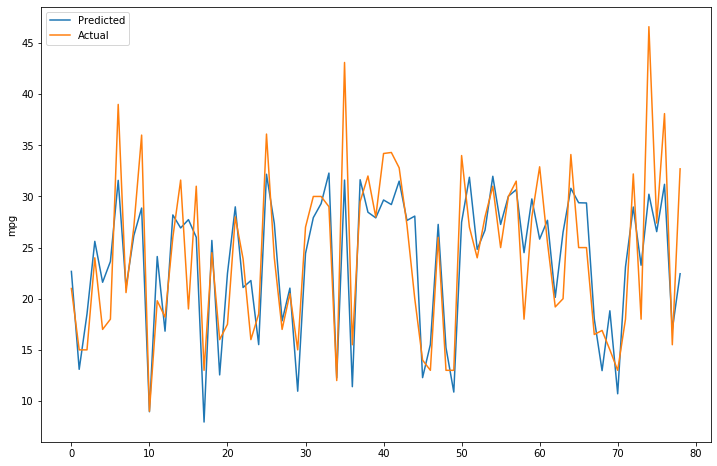

In [21]:
result_dict['mpg ~ kitchen_sink_elastic_net_lasso'] = build_model(partial(elastic_net_reg, alpha=1, 
                                                                    l1_ratio=0, equivalent_to="Lasso"),
                                                                  'mpg',
                                                                 ['cylinders',
                                                                  'displacement',
                                                                  'horsepower',
                                                                  'weight',
                                                                  'acceleration'],
                                                                   automobile_df,
                                                                   show_plot_Y=True)

Equivalent to: Ridge
Training_score :  0.7244317796634632
Test_score :  0.6226755728500412


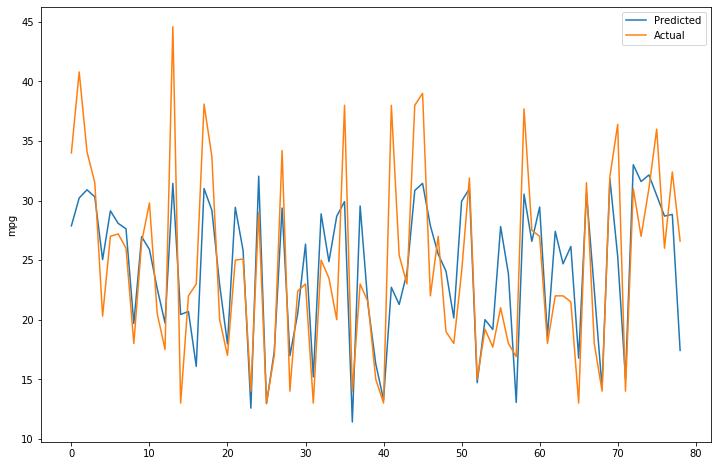

In [22]:
result_dict['mpg ~ kitchen_sink_elastic_net_ridge'] = build_model(partial(elastic_net_reg, alpha=1, 
                                                                    l1_ratio=1, equivalent_to="Ridge"),
                                                                  'mpg',
                                                                 ['cylinders',
                                                                  'displacement',
                                                                  'horsepower',
                                                                  'weight',
                                                                  'acceleration'],
                                                                   automobile_df,
                                                                   show_plot_Y=True)

Equivalent to: Elastic Net
Training_score :  0.6752231864955798
Test_score :  0.8248412744830855


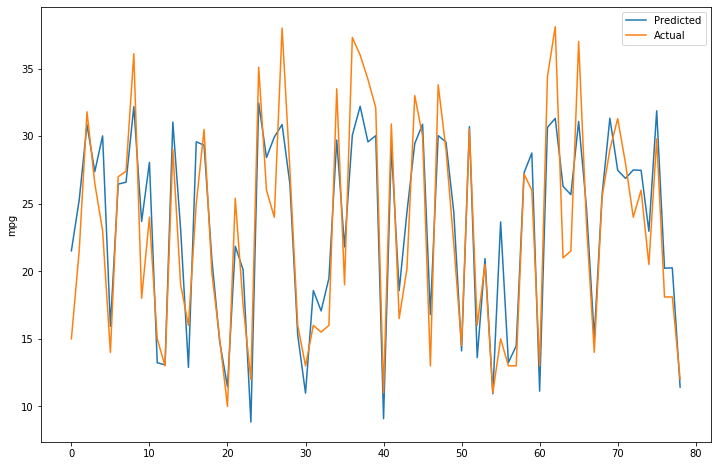

In [23]:
result_dict['mpg ~ kitchen_sink_elastic_net'] = build_model(partial(elastic_net_reg, alpha=1, l1_ratio=0.5),
                                                            'mpg',
                                                          [ 'cylinders',
                                                            'displacement',
                                                            'horsepower',
                                                            'weight',
                                                            'acceleration'],
                                                            automobile_df,
                                                            show_plot_Y=True)

In [24]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.7105014370591779
Test score 0.6087580468377431

Regression:  mpg ~ kitchen_sink_linear
Training score 0.701131072298487
Test score 0.729229225132911

Regression:  mpg ~ parsimonius_linear
Training score 0.7091659495458191
Test score 0.6882830579160173

Regression:  mpg ~ kitchen_sink_lasso
Training score 0.7143193030284241
Test score 0.6770385844474878

Regression:  mpg ~ kitchen_sink_ridge
Training score 0.6837654102537569
Test score 0.6693492082224509

Regression:  mpg ~ kitchen_sink_elastic_net_ols
Training score 0.71236570843431
Test score 0.6706834343569404

Regression:  mpg ~ kitchen_sink_elastic_net_lasso
Training score 0.7118738900062159
Test score 0.6864989774038258

Regression:  mpg ~ kitchen_sink_elastic_net_ridge
Training score 0.7244317796634632
Test score 0.6226755728500412

Regression:  mpg ~ kitchen_sink_elastic_net
Training score 0.6752231864955798
Test score 0.8248412744830855



### For SVR regression with larger datasets this alternate implementations is preferred

https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html#sklearn.svm.LinearSVR

* Uses a different library for implementation
* More flexibility with choice of penalties
* Scales to larger datasets

In [25]:
def svr_reg(x_train, y_train, kernel='linear', epsilon=0.05, C=0.3):
    model = SVR(kernel=kernel, epsilon=epsilon, C=C)
    model.fit(x_train,y_train)
    
    return model

Training_score :  0.7029787445559521
Test_score :  0.668571686233471


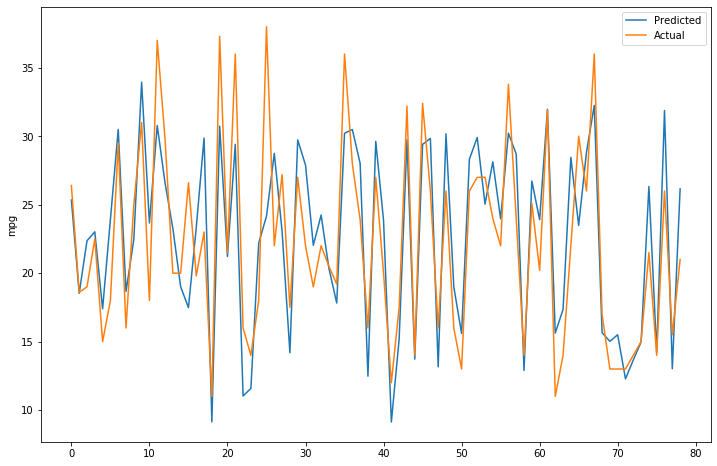

In [26]:
result_dict['mpg ~ kitchen_sink_svr'] = build_model(svr_reg,
                                                    'mpg',
                                                   ['cylinders',
                                                    'displacement',
                                                    'horsepower',
                                                    'weight',
                                                    'acceleration'],
                                                     automobile_df,
                                                     show_plot_Y=True)

In [27]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.7105014370591779
Test score 0.6087580468377431

Regression:  mpg ~ kitchen_sink_linear
Training score 0.701131072298487
Test score 0.729229225132911

Regression:  mpg ~ parsimonius_linear
Training score 0.7091659495458191
Test score 0.6882830579160173

Regression:  mpg ~ kitchen_sink_lasso
Training score 0.7143193030284241
Test score 0.6770385844474878

Regression:  mpg ~ kitchen_sink_ridge
Training score 0.6837654102537569
Test score 0.6693492082224509

Regression:  mpg ~ kitchen_sink_elastic_net_ols
Training score 0.71236570843431
Test score 0.6706834343569404

Regression:  mpg ~ kitchen_sink_elastic_net_lasso
Training score 0.7118738900062159
Test score 0.6864989774038258

Regression:  mpg ~ kitchen_sink_elastic_net_ridge
Training score 0.7244317796634632
Test score 0.6226755728500412

Regression:  mpg ~ kitchen_sink_elastic_net
Training score 0.6752231864955798
Test score 0.8248412744830855

Regression:  mpg ~ kitchen_sink_svr
Train

In [28]:
def kneighbors_reg(x_train, y_train, n_neighbors=10):
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(x_train, y_train)
    
    return model

Training_score :  0.7773951688187782
Test_score :  0.6733317331517342


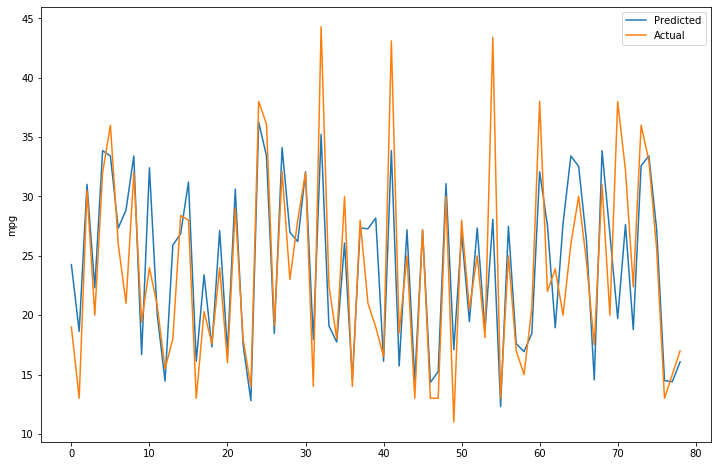

In [29]:
result_dict['mpg ~ kitchen_sink_kneighbors'] = build_model(kneighbors_reg,
                                                           'mpg',
                                                          ['cylinders',
                                                           'displacement',
                                                           'horsepower',
                                                           'weight',
                                                           'acceleration'],
                                                           automobile_df,
                                                           show_plot_Y=True)

In [30]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.7105014370591779
Test score 0.6087580468377431

Regression:  mpg ~ kitchen_sink_linear
Training score 0.701131072298487
Test score 0.729229225132911

Regression:  mpg ~ parsimonius_linear
Training score 0.7091659495458191
Test score 0.6882830579160173

Regression:  mpg ~ kitchen_sink_lasso
Training score 0.7143193030284241
Test score 0.6770385844474878

Regression:  mpg ~ kitchen_sink_ridge
Training score 0.6837654102537569
Test score 0.6693492082224509

Regression:  mpg ~ kitchen_sink_elastic_net_ols
Training score 0.71236570843431
Test score 0.6706834343569404

Regression:  mpg ~ kitchen_sink_elastic_net_lasso
Training score 0.7118738900062159
Test score 0.6864989774038258

Regression:  mpg ~ kitchen_sink_elastic_net_ridge
Training score 0.7244317796634632
Test score 0.6226755728500412

Regression:  mpg ~ kitchen_sink_elastic_net
Training score 0.6752231864955798
Test score 0.8248412744830855

Regression:  mpg ~ kitchen_sink_svr
Train

In [31]:
def apply_standard_scaler(x):
    scaler = StandardScaler()
    scaler.fit(x)  

    return scaler.transform(x)

In [38]:
def sgd_reg(x_train, y_train, max_iter=10000, tol=1e-3):
    model = SGDRegressor(max_iter=max_iter, tol=tol)
    model.fit(x_train, y_train)
    
    return model

Training_score :  0.7023559217191775
Test_score :  0.7103014127949032


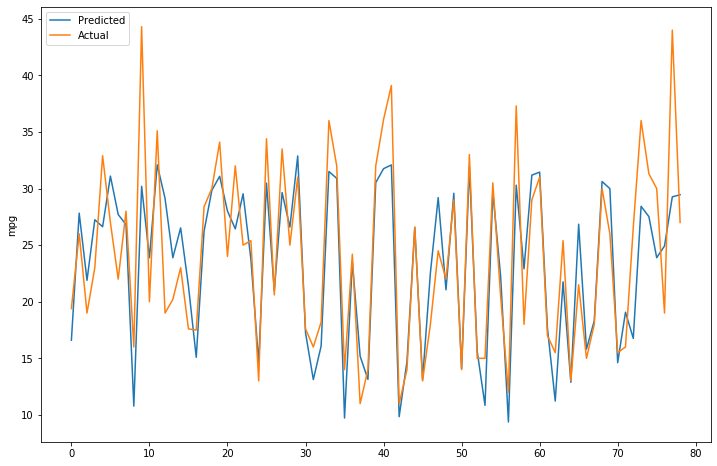

In [39]:
result_dict['mpg ~ kitchen_sink_sgd'] = build_model(sgd_reg,
                                                   'mpg',
                                                  ['cylinders',
                                                   'displacement',
                                                   'horsepower',
                                                   'weight',
                                                   'acceleration'],
                                                    automobile_df,
                                                    show_plot_Y=True,
                                                    preprocess_fn=apply_standard_scaler)

In [40]:
def decision_tree_reg(x_train, y_train, max_depth=2):
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(x_train, y_train)
    
    return model

Training_score :  0.731037055867632
Test_score :  0.6936505403723503


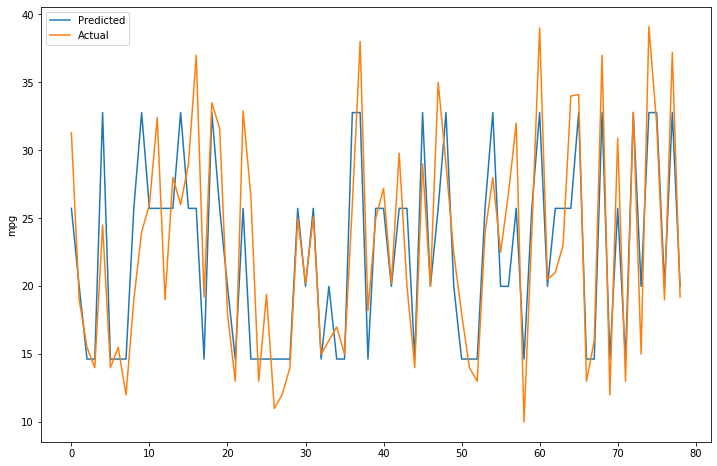

In [41]:
result_dict['mpg ~ kitchen_sink_decision_tree'] = build_model(decision_tree_reg,
                                                             'mpg',
                                                            ['cylinders',
                                                             'displacement',
                                                             'horsepower',
                                                             'weight',
                                                             'acceleration'],
                                                              automobile_df,
                                                              show_plot_Y=True)

In [42]:
def lars_reg(x_train, y_train, n_nonzero_coefs=4):
    model = Lars(n_nonzero_coefs=n_nonzero_coefs)
    model.fit(x_train, y_train)
    
    return model

Training_score :  0.7088200161365563
Test_score :  0.6990113816077232


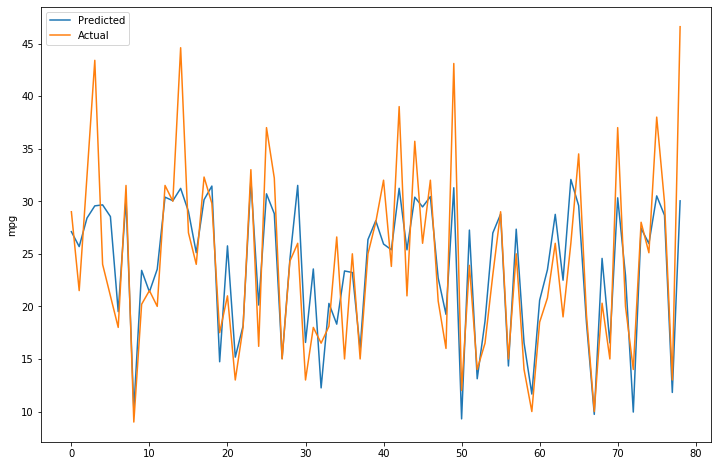

In [43]:
result_dict['mpg ~ kitchen_sink_lars'] = build_model(lars_reg,
                                                    'mpg',
                                                   ['cylinders',
                                                    'displacement',
                                                    'horsepower',
                                                    'weight',
                                                    'acceleration'],
                                                     automobile_df,
                                                     show_plot_Y=True)